# Heart Failure Prediction Portfolio - Notebook 2 of 2

<img src="images/heart.jpg"/>


After completing the **cleaning and EDA** steps on the dataset in the "Heart Failure Prediction Data Cleaning and EDA Notebook 1 of 2" in the project portfolio.

We will now build couple of models to predict the target variable, identify the model with the best performance.

# Table of Content
***
### Define the Problem:

- [Part-1 :](#1.1)

    - [1.1 - Import Packages](#1.1)

    - [1.2 - Classes Definition](#1.2)

- [Part-3 : Model Development](#3)

    - [3.1 Load and Prepare Data For Modeling](#3.1)

    - [3.2 Models Selection](#3.2)
    
    - [3.3 Feature Importance](#3.3)

    - [3.4 Feature Engineering](#3.4)
            
    - [3.5 Models HyperParameter Tuning](#3.5)
        
    - [3.6 Models Evaluation](#3.6)
    
    - [3.7 Best Model Selection](#3.7)
    
    - [3.8 Model Improvement Opportunities](#3.8)


### 1.1 Import Packages <a name="1.1"></a>

In [1]:
#Analysis packages
import pandas as pd
import sklearn as sk
import numpy as np
import scipy.stats as sp

#Visualization packages
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib.ticker import MaxNLocator
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Models & Sklearn packages
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, make_scorer, fbeta_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score as cvs

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


#setting directory where python interpreter looks for code files
import sys
sys.path.insert(0, './scripts')

#read in functions from script file
from codes import data_clean, eda_process
from modelcodes import model

from tqdm import tqdm
import datetime

import warnings
warnings.filterwarnings('ignore')
#your info here
__author__ = "Laniya Oladapo"
__email__ = "laniyadapo@gmail.com"

### 1.2 Define Classes <a name="1.2"></a>

Classes are defined in **"modelcodes.py"** module under script folder in working directory

## Part 3 - Model Development <a name="3"></a>

### 3.1 Load and Prepare Data For Modeling <a name="3.1"></a>

In [2]:
#load the data exported from the Data Cleaning and EDA Notebook into a Pandas dataframe
train_df = pd.read_csv("train_df_forModel.csv")

In [3]:
#Create a copy of data before starting model building process
train_df_init = train_df.copy()

In [4]:
train_df.head()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,0,582,20,1,1.9,130,4,1
1,55.0,0,7861,38,0,1.1,136,6,1
2,65.0,0,146,20,0,1.3,129,7,1
3,50.0,1,111,20,0,1.9,137,7,1
4,65.0,1,160,20,0,2.7,116,8,1


**3.1.1 Prepare dataframes for modeling**

In [5]:
#Create independent features dataframe for modelling
train_df_X = (train_df.drop(['DEATH_EVENT'], axis=1)).copy()

In [6]:
#Create dependent feature dataframe for modelling
train_df_Y = train_df.DEATH_EVENT

In [7]:
#Split training data
X_train, X_test, y_train, y_test = train_test_split(train_df_X, train_df_Y, test_size=0.25, random_state=5)

### 3.2 Models Selection <a name="3.2"></a>

Below are descriptions of selected models and rationale behind selecting them.

1. **Logistic Regression** - is easier to implement, interpret, and very efficient to train. It makes no assumptions about distributions of classes in feature space and very fast at classifying unknown records.
2. **Decision Tree Classifier** - asides from simplicity and ease of interpretation, it uses an internal decision-making logic that allows acquired knowledge from a data set to be extracted in a readable form. Also nonlinear relationships between parameters do not influence the trees performance.
3. **RandomForest Classifier** - is considered as a highly accurate and robust method because of the number of decision trees used. It does not suffer from overfitting problem because it takes the average of all predictions, which cancels out the biases.
4. **GradientBoosting Classifier** - typically produces best predictions because it can optimize on different loss functions and provides several hyperparameter tuning options that make the function fit very flexible.
5. **Support Vector Classifier** - it works relatively well when there is a clear margin of separation between classes and is relatively memory efficient.

**3.2.1 First step is to create the models using default parameters.**

In [8]:
# create models
models_eval = []

models_eval.append(('lr', LogisticRegression()))
models_eval.append(('dtreeC', DecisionTreeClassifier(random_state=1)))
models_eval.append(('RfC', RandomForestClassifier(random_state=1)))
models_eval.append(('Gbc', GradientBoostingClassifier(random_state=1)))
models_eval.append(('SC', SVC()))

print(models_eval)

[('lr', LogisticRegression()), ('dtreeC', DecisionTreeClassifier(random_state=1)), ('RfC', RandomForestClassifier(random_state=1)), ('Gbc', GradientBoostingClassifier(random_state=1)), ('SC', SVC())]


**3.2.2 Evaluate the selected models using the following metrics : Confusion Matrix & Accuracy**
    
    The DEATH_EVENT expected output is a discrete binary value hence we will use from the suite of classification supervised learning algorithms. 

Training Data Confusion Matrix:
[[136  14]
 [ 21  53]]
Testing Data Confusion Matrix:
[[47  6]
 [ 7 15]]
lr: Training Data Accuracy- 0.843750, Validation Data Accuracy- 0.826667
Training Data Confusion Matrix:
[[150   0]
 [  0  74]]
Testing Data Confusion Matrix:
[[46  7]
 [11 11]]
dtreeC: Training Data Accuracy- 1.000000, Validation Data Accuracy- 0.760000
Training Data Confusion Matrix:
[[150   0]
 [  0  74]]
Testing Data Confusion Matrix:
[[48  5]
 [ 8 14]]
RfC: Training Data Accuracy- 1.000000, Validation Data Accuracy- 0.826667
Training Data Confusion Matrix:
[[150   0]
 [  1  73]]
Testing Data Confusion Matrix:
[[45  8]
 [ 8 14]]
Gbc: Training Data Accuracy- 0.995536, Validation Data Accuracy- 0.786667
Training Data Confusion Matrix:
[[150   0]
 [ 71   3]]
Testing Data Confusion Matrix:
[[51  2]
 [21  1]]
SC: Training Data Accuracy- 0.683036, Validation Data Accuracy- 0.693333


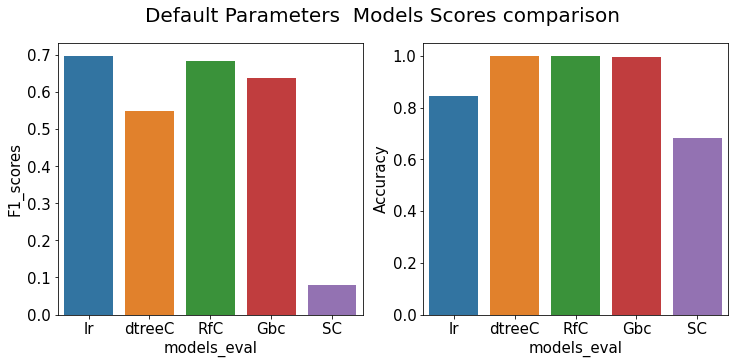

In [9]:
#Evaluate baseline models with default parameters
model_run0 = model(X_train, X_test, y_train, y_test)
model_run0.model_run(models_eval, 'Default Parameters ')

With the metrics established with the defualt parameters, our next task is to improve the scores and select the best model.

Considering the baseline model predictions are based on data provided without extensive feature generation or model tuning we will perform some feature engineering and cross validation to improve the scores and fix any issue of overfitting before selecting the best model.


### 3.3 Feature Importance <a name="3.3"></a>

We will compute **feature importance** with the RandomForest to determine features that can be dropped from the final model.

In [10]:
RfC = RandomForestClassifier(random_state=1)
RfC.fit(X_train, y_train)
features_imp = pd.DataFrame({'feature': train_df_X.columns, 'importance': RfC.feature_importances_}).sort_values(by='importance', ascending=False)
features_imp = features_imp.reset_index()
features_imp

,index,feature,importance
0,7,time,0.367809
1,5,serum_creatinine,0.149799
2,3,ejection_fraction,0.126499
3,0,age,0.117357
4,2,creatinine_phosphokinase,0.109508
5,6,serum_sodium,0.098186
6,1,anaemia,0.017465
7,4,high_blood_pressure,0.013377


Findings :  
    
1. The top 6 important features are :
   - **time**
   - **serum_creatinine**
   - **ejection_fraction**
   - **age**
   - **creatinine_phosphokinase**
   - **serium_sodium**
2. We will drop **anaemia** and **high_blood_pressure** as they also have low correlation to the target variable as discovered during the EDA.

### 3.4 Feature Engineering <a name="3.4"></a>

**3.4.1 Create dataframe for independent features**

In [11]:
#Create independent features dataframe for modelling
train_df_X1 = (train_df.drop(['DEATH_EVENT'], axis=1)).copy()  
train_df_X1

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
0,75.0,0,582,20,1,1.9,130,4
1,55.0,0,7861,38,0,1.1,136,6
2,65.0,0,146,20,0,1.3,129,7
3,50.0,1,111,20,0,1.9,137,7
4,65.0,1,160,20,0,2.7,116,8
...,...,...,...,...,...,...,...,...
294,62.0,0,61,38,1,1.1,143,270
295,55.0,0,1820,38,0,1.2,139,271
296,45.0,0,2060,60,0,0.8,138,278
297,45.0,0,2413,38,0,1.4,140,280


In [12]:
train_df_X1.describe()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,0.431438,581.839465,38.083612,0.351171,1.39388,136.625418,130.260870
std,11.894809,0.496107,970.287881,11.834841,0.478136,1.03451,4.412477,77.614208
min,40.000000,0.000000,23.000000,14.000000,0.000000,0.50000,113.000000,4.000000
25%,51.000000,0.000000,116.500000,30.000000,0.000000,0.90000,134.000000,73.000000
50%,60.000000,0.000000,250.000000,38.000000,0.000000,1.10000,137.000000,115.000000
75%,70.000000,1.000000,582.000000,45.000000,1.000000,1.40000,140.000000,203.000000
max,95.000000,1.000000,7861.000000,80.000000,1.000000,9.40000,148.000000,285.000000


**3.4.2 Perform feature engineering on data to improve model performance**

In [13]:
#Extract all numerical feature ready for encoding
train_df_X1.select_dtypes(exclude=['object']).columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

In [14]:
#Create a dataframe to be utilised for the data normalization
num_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
num_data = train_df_X1[num_features]

In [15]:
#Normalize numerical data in Training Dataset ready for modeling

scaler = StandardScaler()

num_data_scaled = scaler.fit_transform(num_data)
train_df_X1_scaled = pd.DataFrame(num_data_scaled,columns=num_data.columns)
train_df_X1_scaled.head()

,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,1.264666,-4.682176,-1.577879


In [16]:
#Split training data
X1_train, X1_test, y1_train, y1_test = train_test_split(train_df_X1_scaled, train_df_Y, test_size=0.20, random_state=5)

Next stage is to perform **Hyperparameter tuning** to get the parameters that will give the optimal metric for each model.

### 3.5 Models Hyperparameter tuning <a name="3.5"></a>

**3.5.1 Logistic Regression Model Hyperparameter tuning**

In [17]:
lr = LogisticRegression(random_state=7)             # initialize the model

solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']
C = [1, 2, 4, 6, 8, 10]

param_grid = dict(solver = solver_options, multi_class = 
multi_class_options, class_weight = class_weight_options, C = C)


grid = GridSearchCV(lr, param_grid, cv=12, scoring = "accuracy" )
grid.fit(X1_train, y1_train)


print('Best Parameters were: {}'.format(grid.best_params_))
print('Best CrossVal Score was:{}'.format(grid.best_score_))


Best Parameters were: {'C': 1, 'class_weight': 'None', 'multi_class': 'ovr', 'solver': 'newton-cg'}
Best CrossVal Score was:0.8357456140350877


**3.5.2 Decision Tree Classifier Model Hyperparameter tuning**

In [18]:
dtreeC = DecisionTreeClassifier(random_state=7)

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12,16]

param_grid = dict(criterion=criterion, max_depth=max_depth)

grid_dtreeC = GridSearchCV(dtreeC, param_grid, cv=12, scoring= "accuracy")

grid_dtreeC.fit(X1_train, y1_train)

print('Best Parameters were: {}'.format(grid_dtreeC.best_params_))
print('Best CrossVal Score was:{}'.format(grid_dtreeC.best_score_))

Best Parameters were: {'criterion': 'entropy', 'max_depth': 2}
Best CrossVal Score was:0.8245614035087722


**3.5.3 Random Forest Classifier Model Hyperparameter tuning**

In [19]:
RfC = RandomForestClassifier(random_state=7)

n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [1, 2, 4, 5, 6, 7, 8, 10]
criterion = ['gini', 'entropy']

param_grid = dict(criterion=criterion, n_estimators=n_estimators, max_features=max_features, max_depth=max_depth)

grid_RfC = GridSearchCV(RfC, param_grid, cv=12, n_jobs=-1, scoring= "accuracy", verbose = 2)
grid_RfC.fit(X1_train, y1_train)

print('Best Parameters were: {}'.format(grid_RfC.best_params_))
print('Best CrossVal Score was:{}'.format(grid_RfC.best_score_))

Fitting 12 folds for each of 96 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  7.3min finished


Best Parameters were: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
Best CrossVal Score was:0.8578947368421054


**3.5.4 Gradient Boost Model Hyperparameter tuning**

In [20]:
Gbc = GradientBoostingClassifier(random_state=1)

n_estimators = [10, 100, 300, 500, 1000]
max_features = ['sqrt', 'log2']
max_depth = [5, 10, 20,50, 70, 80, 100]
learning_rate = [0.01, 0.03, 0.05, 0.07, 1]
min_samples_split = [100, 300, 500]
min_samples_leaf = [10, 30, 50]

param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, learning_rate=learning_rate,
                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

grid_Gbc = GridSearchCV(Gbc, param_grid, cv=3, n_jobs=-1, scoring= "accuracy", verbose = 2)
grid_Gbc.fit(X1_train, y1_train)

print('Best Parameters were: {}'.format(grid_Gbc.best_params_))
print('Best CrossVal Score was:{}'.format(grid_Gbc.best_score_))

Fitting 3 folds for each of 3150 candidates, totalling 9450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1045 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1490 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2017 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3313 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4082 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4933 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5864 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 6877 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 7970 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 9145 tasks      | 

Best Parameters were: {'learning_rate': 0.03, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 300}
Best CrossVal Score was:0.8742088607594937


**3.5.5 Support Vector Model Hyperparameter tuning**

In [21]:
SC = SVC(random_state=7)

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']


param_grid = dict(kernel=kernel,C=C,gamma=gamma)

grid_SVC = GridSearchCV(estimator=SC, param_grid=param_grid, n_jobs=-1, cv=12, scoring= "accuracy" ,error_score=0)
grid_SVC.fit(X1_train, y1_train)

print('Best Parameters were: {}'.format(grid_SVC.best_params_))
print('Best CrossVal Score was:{}'.format(grid_SVC.best_score_))

Best Parameters were: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best CrossVal Score was:0.8324561403508771


### 3.6 Models Evaluation <a name="3.6"></a>

**3.6.1 Compile the selected models with the best parameters for evaluation**

In [22]:
# create models
models_eval_hp = []

models_eval_hp.append(('lr', LogisticRegression(class_weight= 'None', multi_class= 'ovr', solver= 'newton-cg', C = 1, random_state= 5)))
models_eval_hp.append(('dtreeC', DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, random_state=5)))
models_eval_hp.append(('RfC', RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', n_estimators= 100, random_state=5)))
models_eval_hp.append(('Gbc', GradientBoostingClassifier(n_estimators=300, max_features='sqrt', max_depth=5, learning_rate=0.03, min_samples_split=100, min_samples_leaf=10, random_state=5)))
models_eval_hp.append(('SC', SVC(C= 10.0, gamma= 'scale', kernel= 'poly', random_state=5)))
                   
print(models_eval_hp)

[('lr', LogisticRegression(C=1, class_weight='None', multi_class='ovr', random_state=5,
                   solver='newton-cg')), ('dtreeC', DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=5)), ('RfC', RandomForestClassifier(max_depth=4, max_features='sqrt', random_state=5)), ('Gbc', GradientBoostingClassifier(learning_rate=0.03, max_depth=5, max_features='sqrt',
                           min_samples_leaf=10, min_samples_split=100,
                           n_estimators=300, random_state=5)), ('SC', SVC(C=10.0, kernel='poly', random_state=5))]


**3.6.2 This function is to evaluate the models using the cross validation technique on the split feature training data**

 20%|██        | 1/5 [00:00<00:00,  5.50it/s]

lr: 0.836436 (0.066534)
dtreeC: 0.790780 (0.061827)


 60%|██████    | 3/5 [00:02<00:01,  1.89it/s]

RfC: 0.861879 (0.055384)


100%|██████████| 5/5 [00:05<00:00,  1.06s/it]

Gbc: 0.849202 (0.038996)
SC: 0.790691 (0.051465)


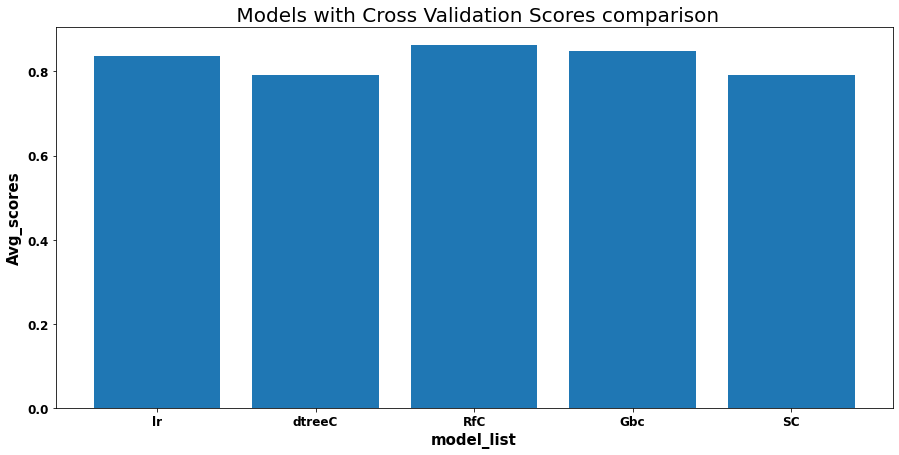

In [23]:
kfold = model(X1_train, X1_test, y1_train, y1_test)
kfold.cross_fold_val(models_eval_hp)

**3.6.3 Explore Ensemble Voting Classifier**

In [24]:
voting_clf = VotingClassifier(estimators=[('LR', lr), ('DTree', dtreeC), ('RFC', RfC), ('GBC', Gbc), ('SVC', SC)], voting='hard')
voting_clf.fit(X1_train, y1_train)
preds = voting_clf.predict(X1_test)
acc = accuracy_score(y1_test, preds)
confmat = confusion_matrix(y1_test, preds)
#l_loss = log_loss(y1_test, preds)
f1 = f1_score(y1_test, preds)

print("Accuracy is: " + str(acc))
#print("Log Loss is: " + str(l_loss))
print("F1 Score is: " + str(f1))

print("The Confusion matrix:\n", confmat)

Accuracy is: 0.8
F1 Score is: 0.6470588235294118
The Confusion matrix:
 [[37  6]
 [ 6 11]]


**Findings :**  
    
The ensemble voting classifier approach does not provide an improved result.

**3.6.4 Evaluate model performance with ROC Curve Plot**

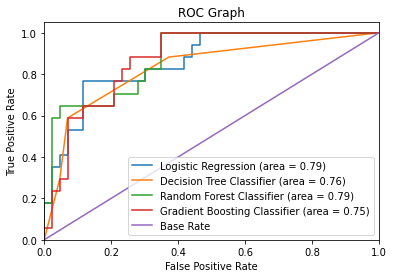

In [25]:
lr = LogisticRegression(class_weight= 'None', multi_class= 'ovr', solver= 'newton-cg', C = 1, random_state= 5)
dtreeC = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, random_state=5)
RfC = RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', n_estimators= 100, random_state=5)
Gbc = GradientBoostingClassifier(n_estimators=300, max_features='sqrt', max_depth=5, learning_rate=0.03, min_samples_split=100, min_samples_leaf=10, random_state=5)
SC = SVC(C= 10.0, gamma= 'scale', kernel= 'poly', random_state=5)

lr= lr.fit(X1_train, y1_train)
dtreeC= dtreeC.fit(X1_train, y1_train)
RfC= RfC.fit(X1_train, y1_train)
Gbc= Gbc.fit(X1_train, y1_train)
SC= SC.fit(X1_train, y1_train)

lr_roc_auc = roc_auc_score(y1_test, lr.predict(X1_test))
dtreeC_roc_auc = roc_auc_score(y1_test, dtreeC.predict(X1_test))
RfC_roc_auc = roc_auc_score(y1_test, RfC.predict(X1_test))
Gbc_roc_auc = roc_auc_score(y1_test, Gbc.predict(X1_test))
SC_roc_auc = roc_auc_score(y1_test, SC.predict(X1_test))



# Create ROC Graph
from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y1_test, lr.predict_proba(X1_test)[:,1])
dtreeC_fpr, dtreeC_tpr, dtreeC_thresholds = roc_curve(y1_test, dtreeC.predict_proba(X1_test)[:,1])
RfC_fpr, RfC_tpr, RfC_thresholds = roc_curve(y1_test, RfC.predict_proba(X1_test)[:,1])
Gbc_fpr, Gbc_tpr, Gbc_thresholds = roc_curve(y1_test, Gbc.predict_proba(X1_test)[:,1])
#SC_fpr, SC_tpr, SC_thresholds = roc_curve(y2_test, SC.predict_proba(X2_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

# Plot Decision Tree ROC
plt.plot(dtreeC_fpr, dtreeC_tpr, label='Decision Tree Classifier (area = %0.2f)' % dtreeC_roc_auc)

# Plot Random Forest ROC
plt.plot(RfC_fpr, RfC_tpr, label='Random Forest Classifier (area = %0.2f)' % RfC_roc_auc)

# Plot Gradient Boost ROC
plt.plot(Gbc_fpr, Gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % Gbc_roc_auc)

# Plot Support Vector ROC
#plt.plot(SC_fpr, SC_tpr, label='Support Vector Classifier (area = %0.2f)' % SC_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

**Findings :**  
    
Random Forest Model has the best Area under the curve, hence will be selected as best Model for deployment.

### 3.7 Best Model Selection <a name="3.7"></a>

**3.7.1 Define best model selected from section 3.6**

In [26]:
#Best Model is selected
bestModel = RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', n_estimators= 100, random_state=5)
bestModel

RandomForestClassifier(max_depth=4, max_features='sqrt', random_state=5)

**3.7.2 Recall and Precision Review from Train Data Predictions**

In [27]:
#Evaluate the split train data with the bestModel to review TP & FN
evaluation = model(X1_train, X1_test, y1_train, y1_test)
evaluation.bestmodel_eval(bestModel)

The Confusion matrix:
 [[156   4]
 [ 15  64]]
Precision Score: 0.94
Recall Score: 0.81


**Findings :**  
    
There are 4 False Positive predictions which means patients that actually died but we predicted as alive. This is not acceptable as we will miss patients that should be giving more treatments because of the wrong model prediction.
    
Therefore, we want to have an interpretable model that has a great precision to minimize the false positive which helps us avaoid missing patients that need treatment, and a model that could have a lower specificity (e.g., recall) which increases patients that actually lived but we predict as died. This patients will only undergo further tests but will eventualy live.

**3.7.3 Identify threshold value that provides optimal precision value**

In [28]:
#Exploring threshold value increase to reduce the number of false positives 
y_pred_prob = bestModel.predict_proba(X1_train)[:,1]
y_pred_class = np.where(y_pred_prob<0.65,0,1)

trainprobpred = model(X1_train, X1_test, y1_train, y1_test)
trainprobpred.summary_metrics(y1_train, y_pred_class)

Confusion matrix:
 [[160   0]
 [ 23  56]]

Accuracy: 0.9
Sensitivity: 0.71
Precision: 1.0
F1-Score: 0.83
AUC: 0.85


**3.7.4 Evaluate model performance with threshold on split test data**

In [29]:
#Evaluate model performance with threshold value on split test data.
test_predictions_prob = bestModel.predict_proba(X1_test)[:,1]
y_testpred_class = np.where(test_predictions_prob<0.65, 0, 1)

testprobpred = model(X1_train, X1_test, y1_train, y1_test)
testprobpred.summary_metrics(y1_test, y_testpred_class)

Confusion matrix:
 [[41  2]
 [ 7 10]]

Accuracy: 0.85
Sensitivity: 0.59
Precision: 0.83
F1-Score: 0.69
AUC: 0.77


**Findings :**  
    
There are still 2 False Positive predictions that we can eliminate by further decreasing our threshold. A decision needs to be made on what we will do about the threshold. 

Definitely losing a life due to wrong model prediction is unacceptable.

### 3.8 Model Improvement Opportunities <a name="3.8"></a>

1. Review and consider collecting more features for each patients.
2. Consider addressing imbalance in the data set.

### This is the conclusion of the Project. The model is available for deployment based on available data.